**Diabetes Prediction Tool** - CL10 Mini Project



**Name**: Vedant Puranik

**Roll No**: 43152

**Class**: BE-9

**Batch**: P9




**Name**: Sahil Naphade

**Roll No**: 43141

**Class**: BE-9

**Batch**: P9

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import pickle
import io

import matplotlib.pyplot as plt
import seaborn as sns

import time
import warnings
warnings.filterwarnings('ignore')

# Reading data

In [ ]:
from google.colab import files
uploaded_data = files.upload()

Saving diabetes_pima.csv to diabetes_pima (1).csv


In [ ]:
diabetes_df = pd.read_csv(io.BytesIO(uploaded_data['diabetes_pima.csv']))

In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Dataset Exploration

In [ ]:
diabetes_df.shape

(768, 9)

In [ ]:
np.unique(diabetes_df['Outcome'])

array([0, 1])

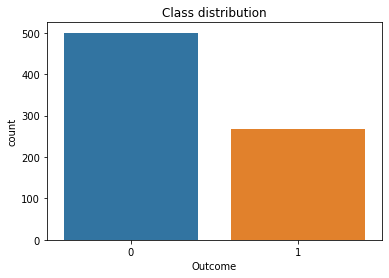

In [ ]:
plt.figure()
plt.title('Class distribution')
sns.countplot(diabetes_df['Outcome'])
plt.show()

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_true_df = diabetes_df[diabetes_df['Outcome']==1]
diabetes_true_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [ ]:
def plot_histograms_seaborn(df):
  fig, axes = plt.subplots(3, 3,figsize=(20,12))
  sns.set_theme(style="darkgrid")
  sns.histplot(data=df,x='Pregnancies',ax=axes[0,0])
  sns.histplot(data=df,x='Glucose',ax=axes[0,1])  
  sns.histplot(data=df,x='BloodPressure',ax=axes[0,2])
  sns.histplot(data=df,x='SkinThickness',ax=axes[1,0])
  sns.histplot(data=df,x='Insulin',ax=axes[1,1])
  sns.histplot(data=df,x='BMI',ax=axes[1,2])
  sns.histplot(data=df,x='DiabetesPedigreeFunction',ax=axes[2,0])
  sns.histplot(data=df,x='Age',ax=axes[2,1])

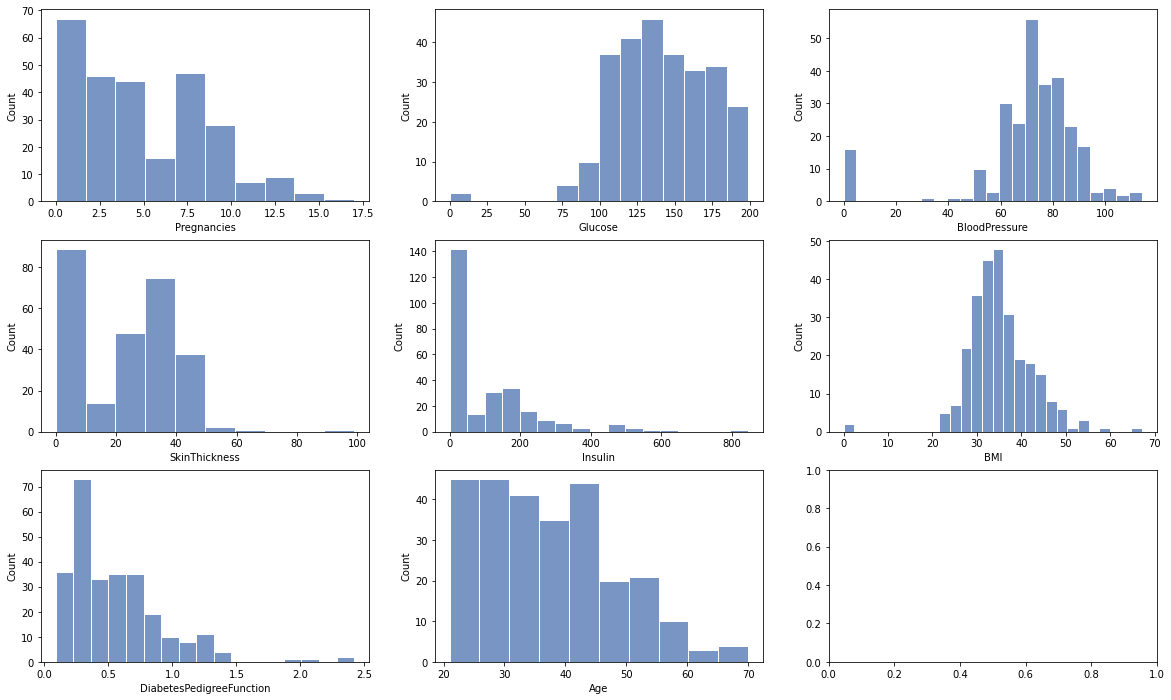

In [ ]:
plot_histograms_seaborn(diabetes_true_df)

In [ ]:
diabetes_true_df.columns[0]

'Pregnancies'

# Preprocessing

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7f6b0ee10>,
      dtype=object)

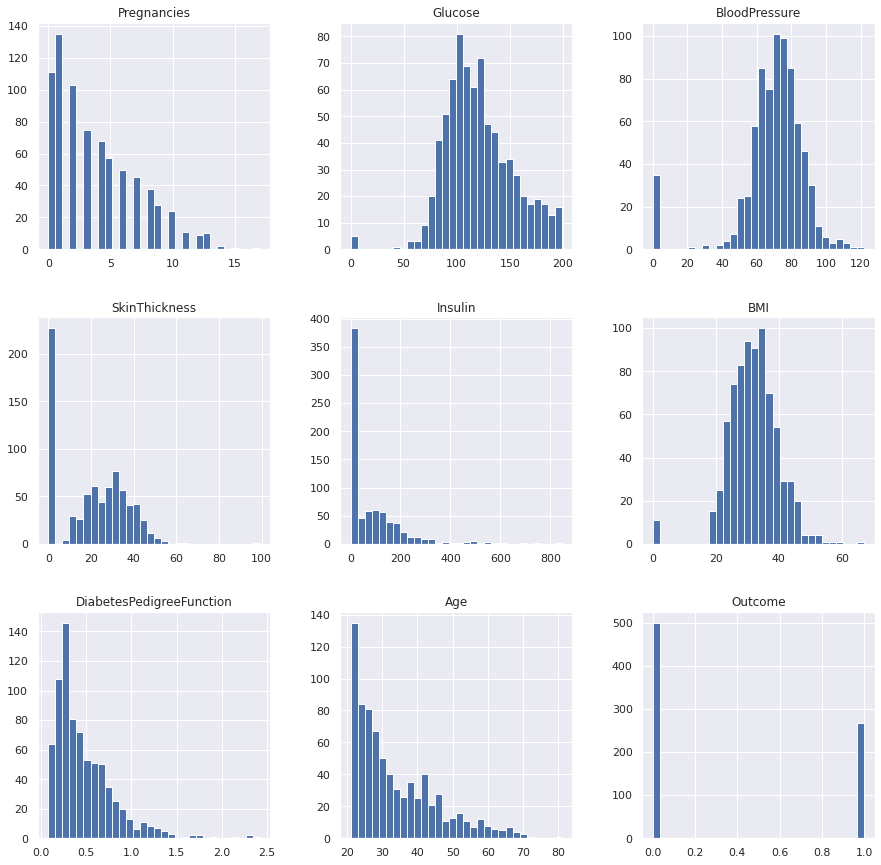

In [ ]:
diabetes_df.hist(figsize = (15, 15), bins = 30)

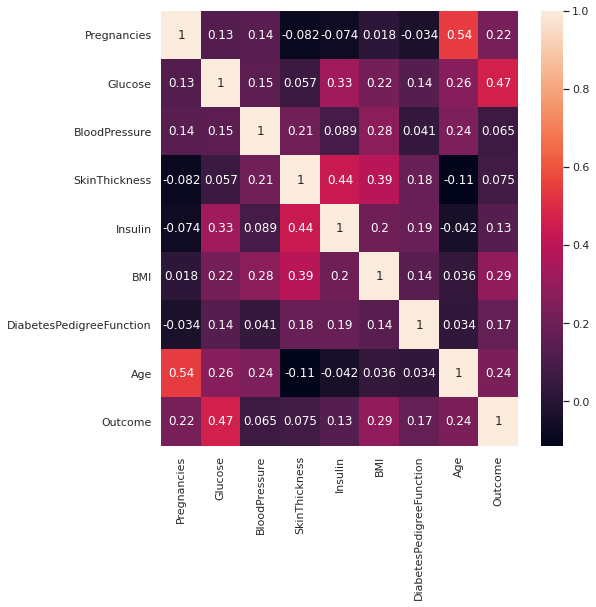

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(diabetes_df.corr(),annot=True)

In [ ]:
for column in diabetes_df.columns:    
    if 0 in diabetes_df[column]:
        print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [ ]:
nonzerocols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [ ]:
diabetes_df[nonzerocols] = diabetes_df[nonzerocols].replace(0, np.NaN)

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
for column in nonzerocols:
    diabetes_df[column] = diabetes_df[column].replace(np.NaN, int(diabetes_df[column].mean(skipna = True)))

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7f6b88890>,
      dtype=object)

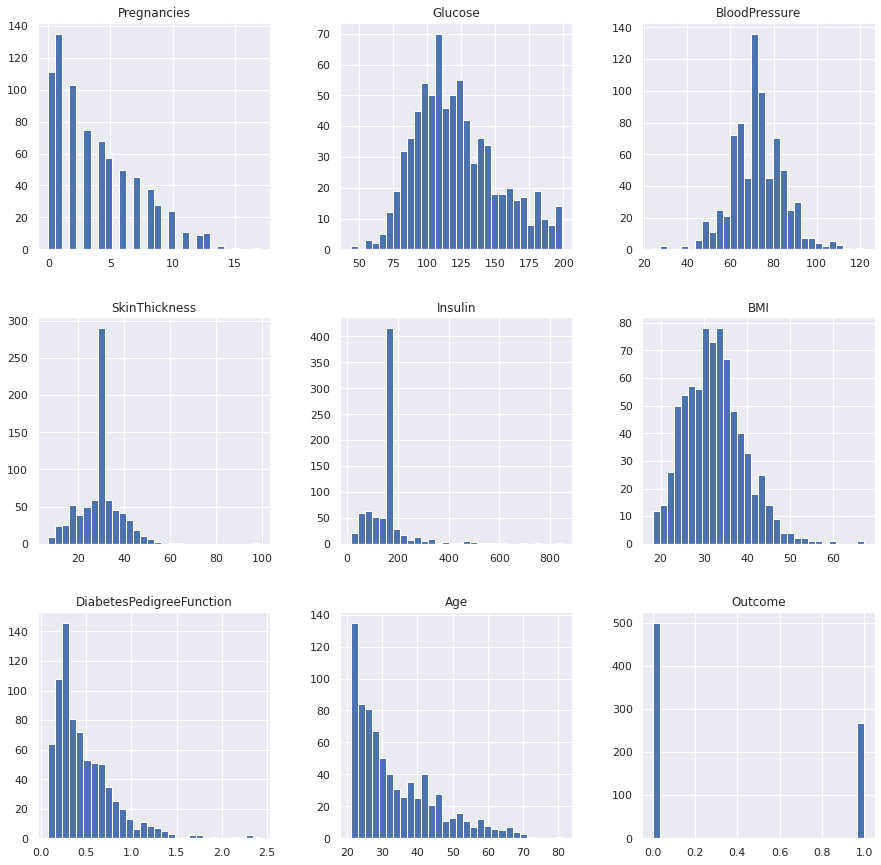

In [ ]:
diabetes_df.hist(figsize = (15, 15),bins = 30)

In [ ]:
def thresholdLimits(df,var):
    quartile1 = df[var].quantile(0.25)
    quartile3 = df[var].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + (1.5 * interquantile_range)    
    low_limit = quartile1 - (1.5 * interquantile_range) 
    return low_limit, up_limit

In [ ]:
def doOutliersExist(df, var):
    low_limit, up_limit = thresholdLimits(df, var)
    if df[(df[var] < low_limit) | (df[var] > up_limit)].any(axis = None):
        print(var, "yes")
    else: 
        print(var, "no")

In [ ]:
def replaceWithThresholds(df, numeric_columns):
    for column in numeric_columns:
        low_limit, up_limit = thresholdLimits(df,column)
        df.loc[(df[column] < low_limit), column] = low_limit
        df.loc[(df[column] > up_limit), column] = up_limit

In [ ]:
for column in diabetes_df.columns: 
    doOutliersExist(diabetes_df, column)

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [ ]:
replaceWithThresholds(diabetes_df,diabetes_df.columns)

In [ ]:
for column in diabetes_df.columns:
    doOutliersExist(diabetes_df, column)

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7f66daf90>,
      dtype=object)

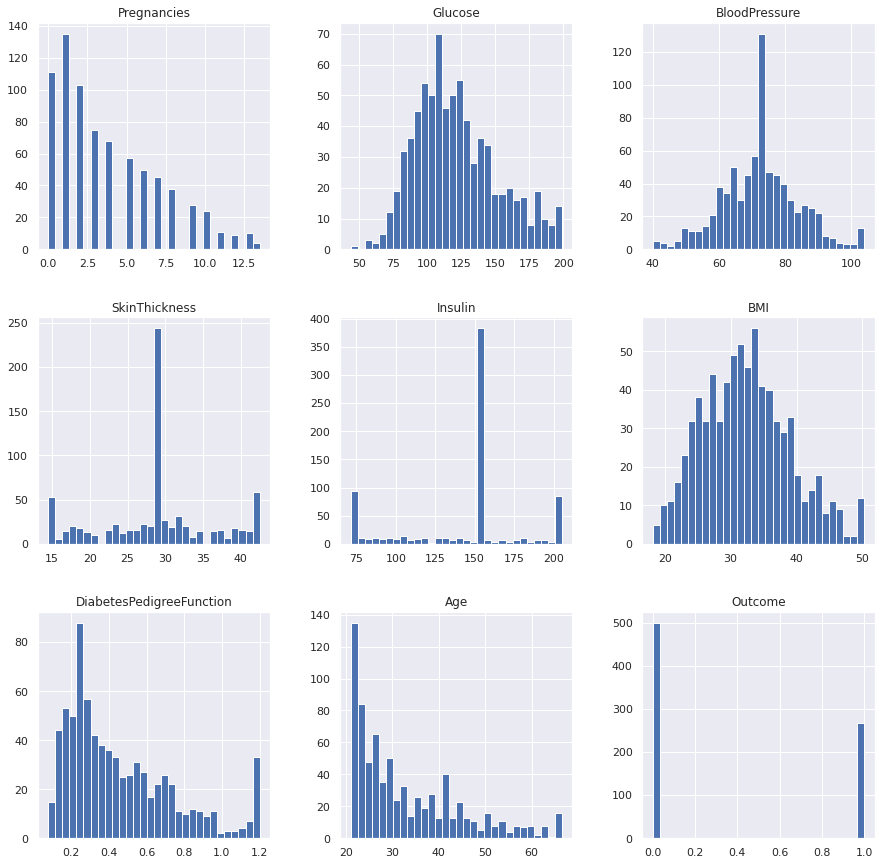

In [ ]:
diabetes_df.hist(figsize = (15, 15), bins = 30)

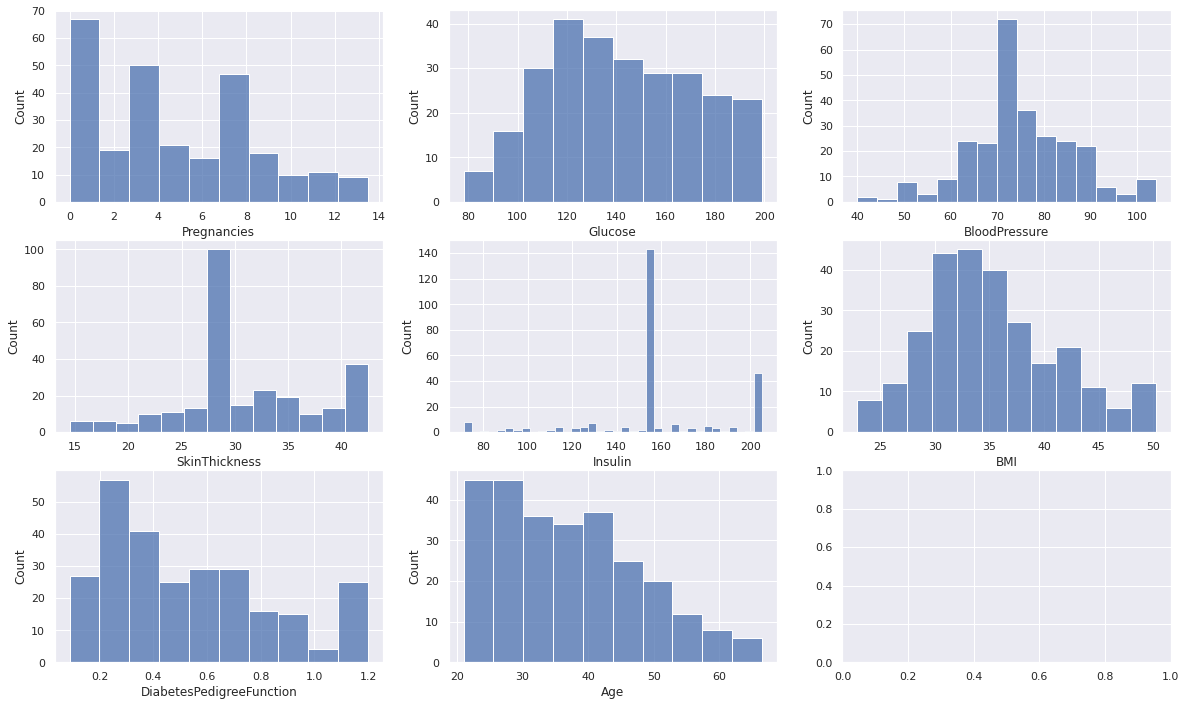

In [ ]:
plot_histograms_seaborn(diabetes_df[diabetes_df['Outcome']==1])

In [ ]:
BMICategory = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

diabetes_df["BMICategory"] = BMICategory

diabetes_df.loc[diabetes_df["BMI"] < 18.5, "BMICategory"] = BMICategory[0]
diabetes_df.loc[(diabetes_df["BMI"] > 18.5) & (diabetes_df["BMI"] <= 24.9), "BMICategory"] = BMICategory[1]
diabetes_df.loc[(diabetes_df["BMI"] > 24.9) & (diabetes_df["BMI"] <= 29.9), "BMICategory"] = BMICategory[2]
diabetes_df.loc[(diabetes_df["BMI"] > 29.9) & (diabetes_df["BMI"] <= 34.9), "BMICategory"] = BMICategory[3]
diabetes_df.loc[(diabetes_df["BMI"] > 34.9) & (diabetes_df["BMI"] <= 39.9), "BMICategory"] = BMICategory[4]
diabetes_df.loc[diabetes_df["BMI"] > 39.9 ,"BMICategory"] = BMICategory[5]

In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMICategory
0,6.0,148.0,72.0,35.0,155.0,33.6,0.627,50.0,1.0,Obesity 1
1,1.0,85.0,66.0,29.0,155.0,26.6,0.351,31.0,0.0,Overweight
2,8.0,183.0,64.0,29.0,155.0,23.3,0.672,32.0,1.0,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Overweight
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0,Obesity 3


In [ ]:
def oneHotEncoder(dataframe, categorical_columns):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns = categorical_columns, drop_first = True)
    new_columns = [col for col in dataframe.columns if col not in original_columns]
    return dataframe, new_columns

In [ ]:
diabetes_df, new_cols_ohe = oneHotEncoder(diabetes_df, ["BMICategory"])
diabetes_df = diabetes_df.drop(["BMI"], axis = 1)
new_cols_ohe

['BMICategory_Obesity 1',
 'BMICategory_Obesity 2',
 'BMICategory_Obesity 3',
 'BMICategory_Overweight',
 'BMICategory_Underweight']

In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome,BMICategory_Obesity 1,BMICategory_Obesity 2,BMICategory_Obesity 3,BMICategory_Overweight,BMICategory_Underweight
0,6.0,148.0,72.0,35.0,155.0,0.627,50.0,1.0,1,0,0,0,0
1,1.0,85.0,66.0,29.0,155.0,0.351,31.0,0.0,0,0,0,1,0
2,8.0,183.0,64.0,29.0,155.0,0.672,32.0,1.0,0,0,0,0,0
3,1.0,89.0,66.0,23.0,94.0,0.167,21.0,0.0,0,0,0,1,0
4,0.0,137.0,40.0,35.0,168.0,1.200,33.0,1.0,0,0,1,0,0


In [ ]:
y = diabetes_df["Outcome"]
temp = ["Outcome"] + new_cols_ohe # + ['Insulin', 'SkinThickness', 'BloodPressure']
X = diabetes_df.drop(temp, axis = 1)
cols = X.columns
index = X.index

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,155.0,0.627,50.0
1,1.0,85.0,66.0,29.0,155.0,0.351,31.0
2,8.0,183.0,64.0,29.0,155.0,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,1.200,33.0


In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,0.647150,0.865254,-0.030632,0.824667,0.292002,0.588927,1.445691
1,-0.848970,-1.206013,-0.543914,0.017945,0.292002,-0.378101,-0.189304
2,1.245598,2.015957,-0.715008,0.017945,0.292002,0.746595,-0.103252
3,-0.848970,-1.074504,-0.543914,-0.788777,-1.272288,-1.022787,-1.049828
4,-1.148194,0.503604,-2.768136,0.824667,0.625375,2.596563,-0.017199


In [ ]:
print(sc)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
pickle.dump(sc,open('scaler.pkl','wb'))

In [ ]:
X = pd.concat([X, diabetes_df[new_cols_ohe]], axis = 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,BMICategory_Obesity 1,BMICategory_Obesity 2,BMICategory_Obesity 3,BMICategory_Overweight,BMICategory_Underweight
0,0.647150,0.865254,-0.030632,0.824667,0.292002,0.588927,1.445691,1,0,0,0,0
1,-0.848970,-1.206013,-0.543914,0.017945,0.292002,-0.378101,-0.189304,0,0,0,1,0
2,1.245598,2.015957,-0.715008,0.017945,0.292002,0.746595,-0.103252,0,0,0,0,0
3,-0.848970,-1.074504,-0.543914,-0.788777,-1.272288,-1.022787,-1.049828,0,0,0,1,0
4,-1.148194,0.503604,-2.768136,0.824667,0.625375,2.596563,-0.017199,0,0,1,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1df01048d0>,
      dtype=object)

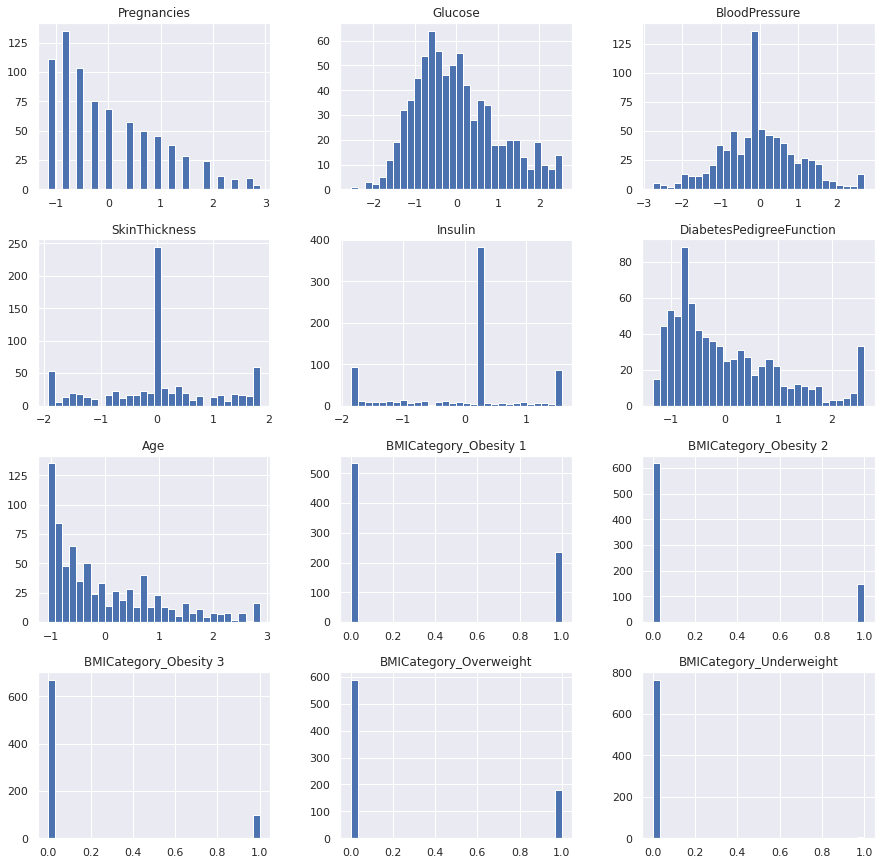

In [ ]:
X.hist(figsize = (15, 15), bins = 30)

#Training Models

In [ ]:
def run_models(train_X,train_y,test_X,test_y):   
    models = [LogisticRegression(),GaussianNB(),SVC(kernel='linear'),KNeighborsClassifier(),
              DecisionTreeClassifier(),RandomForestClassifier(n_estimators=20,random_state=0),XGBClassifier()]
    train_accuracy_models = []
    test_accuracy_models = []
    classifiers = pd.Series(['LogisticRegression','GaussianNB','SVC','KNeighborsClassifier',
                             'DecisionTreeClassifier','RandomForestClassifier','XGBClassifier'])
    for model in models:
        model.fit(train_X,train_y)
        y_pred = model.predict(test_X)
        train_acc = model.score(train_X,train_y)
        test_acc = accuracy_score(test_y,y_pred)
        train_accuracy_models.append(train_acc)
        test_accuracy_models.append(test_acc)
        #rmse_models.append(model_rmse)
    results = pd.DataFrame(data={'Classifiers':classifiers,'Train Accuracy':train_accuracy_models,'Test Accuracy':test_accuracy_models})#'RMSE':rmse_models})
    return results

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.20)

In [ ]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred) * 100)
cm = confusion_matrix(y_test, y_pred)
print("\n", cm)
print ('\n Classification report:\n') 
print(classification_report(y_test, y_pred))

80.51948051948052

 [[96 11]
 [19 28]]

 Classification report:

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       107
         1.0       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred) * 100)

cm = confusion_matrix(y_test, y_pred)
print("\n", cm)

print ('\n Classification report:\n') 
print(classification_report(y_test, y_pred))

73.37662337662337

 [[83 24]
 [17 30]]

 Classification report:

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       107
         1.0       0.56      0.64      0.59        47

    accuracy                           0.73       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.75      0.73      0.74       154



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20, random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred) * 100)
cm = confusion_matrix(y_test, y_pred)
print("\n", cm)
print ('\n Classification report:\n') 
print(classification_report(y_test, y_pred))

81.16883116883116

 [[94 13]
 [16 31]]

 Classification report:

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       107
         1.0       0.70      0.66      0.68        47

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



In [ ]:
results = run_models(X_train,y_train,X_test,y_test)

In [ ]:
results

,Classifiers,Train Accuracy,Test Accuracy
0,LogisticRegression,0.765472,0.811688
1,GaussianNB,0.379479,0.331169
2,SVC,0.765472,0.805195
3,KNeighborsClassifier,0.806189,0.792208
4,DecisionTreeClassifier,1.000000,0.701299
5,RandomForestClassifier,0.991857,0.811688
6,XGBClassifier,0.884365,0.798701


#Hyperparameter Tuning

In [ ]:
#Tune for Random Forest
data = {'n_estimators':[],'max_depth':[],'min_samples_split':[],'Test Accuracy':[]}
rf_tuning = pd.DataFrame(data=data)
rf_tuning

,n_estimators,max_depth,min_samples_split,Test Accuracy


In [ ]:
max_depth_list = [4,8,12,16,20]
min_samples_leaf_list = [3, 4, 5]
n_estimators_list = [50, 100, 200, 300, 500]

start_time = time.time()

for n_estimators in n_estimators_list:
  for min_samples_leaf in min_samples_leaf_list:
    for max_depth in max_depth_list:
      randomForest = RandomForestClassifier(n_estimators=n_estimators,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
      randomForest.fit(X_train,y_train)
      randomForest_y_pred = randomForest.predict(X_test)
      randomForest_test_acc = accuracy_score(y_test, randomForest_y_pred) 
      df = pd.DataFrame(data={'n_estimators':[randomForest.get_params()['n_estimators']],
                        'max_depth':[randomForest.get_params()['max_depth']],
                        'min_samples_split':[randomForest.get_params()['min_samples_split']],
                        'Test Accuracy':[randomForest_test_acc]})
      rf_tuning = rf_tuning.append(df,ignore_index=True)      
print('Total time for execution: {}'.format(time.time()-start_time))

Total time for execution: 29.2100613117218


In [ ]:
rf_tuning.sort_values(by=['Test Accuracy'],ascending=False)

,n_estimators,max_depth,min_samples_split,Test Accuracy
87,50.0,12.0,2.0,0.831169
99,100.0,20.0,2.0,0.831169
118,200.0,16.0,2.0,0.824675
68,500.0,16.0,2.0,0.824675
73,500.0,16.0,2.0,0.824675
...,...,...,...,...
125,300.0,4.0,2.0,0.779221
0,50.0,4.0,2.0,0.779221
80,50.0,4.0,2.0,0.772727
95,100.0,4.0,2.0,0.772727


In [ ]:
rf_tuning.to_csv('RandomForest_tuning.csv')
files.download('RandomForest_tuning.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Tune for KNN
data = {'n_neighbors':[],'weights':[],'leaf_size':[],'Test Accuracy':[]}
knn_tuning = pd.DataFrame(data=data)
knn_tuning

,n_neighbors,weights,leaf_size,Test Accuracy


In [ ]:
n_neighbors_list = [2,3,4,5,7,9]
weights_list = ['uniform','distance']
leaf_size_list = np.arange(20,55,5)

start_time = time.time()

for n_neighbors in n_neighbors_list:
  for weights in weights_list:
    for leaf_size in leaf_size_list:
      knn = KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights,leaf_size=leaf_size)
      knn.fit(X_train,y_train)
      knn_y_pred = knn.predict(X_test)
      knn_test_acc = accuracy_score(y_test,knn_y_pred) 
      df = pd.DataFrame(data={'n_neighbors':[knn.get_params()['n_neighbors']],
                        'weights':[knn.get_params()['weights']],
                        'leaf_size':[knn.get_params()['leaf_size']],
                        'Test Accuracy':[knn_test_acc]})
      knn_tuning = knn_tuning.append(df,ignore_index=True)      
print('Total time for execution: {}'.format(time.time()-start_time))

Total time for execution: 0.7964181900024414


In [ ]:
knn_tuning.sort_values(by=['Test Accuracy'],ascending=False)

,n_neighbors,weights,leaf_size,Test Accuracy
29,4.0,uniform,25.0,0.805195
28,4.0,uniform,20.0,0.805195
30,4.0,uniform,30.0,0.805195
31,4.0,uniform,35.0,0.805195
32,4.0,uniform,40.0,0.805195
...,...,...,...,...
12,2.0,distance,45.0,0.707792
11,2.0,distance,40.0,0.707792
10,2.0,distance,35.0,0.707792
9,2.0,distance,30.0,0.707792


In [ ]:
knn_tuning.to_csv('KNN_tuning.csv')
files.download('KNN_tuning.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Tune for XGBoost
data = {'n_estimators':[],'learning_rate':[],'max_depth':[],'Test Accuracy':[]}
xgb_tuning = pd.DataFrame(data=data)
xgb_tuning

,n_estimators,learning_rate,max_depth,Test Accuracy


In [ ]:
max_depth_list = [4,8,12,16,20]
learning_rate_list = [0.1,0.01,0.001]
n_estimators_list = [50,100,200,300,500]

start_time = time.time()

for n_estimators in n_estimators_list:
  for learning_rate in learning_rate_list:
    for max_depth in max_depth_list:
      xgb = XGBClassifier(n_estimators=n_estimators,learning_rate=learning_rate,max_depth=max_depth)
      xgb.fit(X_train,y_train)
      xgb_y_pred = xgb.predict(X_test)
      xgb_test_acc = accuracy_score(y_test, xgb_y_pred) 
      df = pd.DataFrame(data={'n_estimators':[xgb.get_params()['n_estimators']],
                        'learning_rate':[xgb.get_params()['learning_rate']],
                        'max_depth':[xgb.get_params()['max_depth']],
                        'Test Accuracy':[xgb_test_acc]})
      xgb_tuning = xgb_tuning.append(df,ignore_index=True)      
print('Total time for execution: {}'.format(time.time()-start_time))

Total time for execution: 18.98184609413147


In [ ]:
xgb_tuning.sort_values(by=['Test Accuracy'],ascending=False)

,n_estimators,learning_rate,max_depth,Test Accuracy
49,300.0,0.100,20.0,0.818182
63,500.0,0.100,16.0,0.811688
31,200.0,0.100,8.0,0.811688
33,200.0,0.100,16.0,0.811688
64,500.0,0.100,20.0,0.811688
...,...,...,...,...
13,50.0,0.001,16.0,0.727273
14,50.0,0.001,20.0,0.727273
56,300.0,0.001,8.0,0.727273
26,100.0,0.001,8.0,0.714286


In [ ]:
xgb_tuning.to_csv('XGB_tuning.csv')
files.download('XGB_tuning.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Tune for SVC
data = {'C':[],'gamma':[],'kernel':[],'Test Accuracy':[]}
svc_tuning = pd.DataFrame(data=data)
svc_tuning

,C,gamma,kernel,Test Accuracy


In [ ]:
C_list = [0.1, 1, 10, 100, 1000]
gamma_list = [1, 0.1, 0.01, 0.001, 0.0001]
kernel_list = ['rbf','linear']

start_time = time.time()

for C in C_list:
  for gamma in gamma_list:
    for kernel in kernel_list:
      svc = SVC(C=C,gamma=gamma,kernel=kernel)
      svc.fit(X_train,y_train)
      svc_y_pred = svc.predict(X_test)
      svc_test_acc = accuracy_score(y_test,svc_y_pred) 
      df = pd.DataFrame(data={'C':[svc.get_params()['C']],
                        'gamma':[svc.get_params()['gamma']],
                        'kernel':[svc.get_params()['kernel']],
                        'Test Accuracy':[svc_test_acc]})
      svc_tuning = svc_tuning.append(df,ignore_index=True)      
print('Total time for execution: {}'.format(time.time()-start_time))

Total time for execution: 13.060643911361694


In [ ]:
svc_tuning.sort_values(by=['Test Accuracy'],ascending=False)

,C,gamma,kernel,Test Accuracy
2,0.1,0.1000,rbf,0.811688
25,10.0,0.0100,linear,0.805195
35,100.0,0.0100,linear,0.805195
21,10.0,1.0000,linear,0.805195
23,10.0,0.1000,linear,0.805195
27,10.0,0.0010,linear,0.805195
29,10.0,0.0001,linear,0.805195
31,100.0,1.0000,linear,0.805195
33,100.0,0.1000,linear,0.805195
37,100.0,0.0010,linear,0.805195


In [ ]:
svc_tuning.to_csv('SVC_tuning.csv')
files.download('SVC_tuning.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Best Model

In [ ]:
model = RandomForestClassifier(n_estimators = 50,max_depth = 12.0,min_samples_split=2,random_state=31)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred) * 100)
cm = confusion_matrix(y_test, y_pred)
print("\n", cm)
print ('\n Classification report:\n') 
print(classification_report(y_test, y_pred))

83.11688311688312

 [[94 13]
 [13 34]]

 Classification report:

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       107
         1.0       0.72      0.72      0.72        47

    accuracy                           0.83       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.83      0.83      0.83       154



# Saving and Loading Model


In [ ]:
filename = 'randomForestModel.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8311688311688312


# Data Preprocessing

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Building Model without preprocessing**

In [ ]:
#Removing columns SkinThickness, BloodPressure, Insulin

X = diabetes_df.drop(columns=['Outcome'])
y = diabetes_df['Outcome']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (768, 8)
Shape of y: (768,)


In [ ]:
#X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of X_train: (576, 8)
Shape of X_test: (192, 8)
Shape of y_train: (576,)
Shape of y_test: (192,)


In [ ]:
results = run_models(X_train,y_train,X_test,y_test)

In [ ]:
results

,Classifiers,Train Accuracy,Test Accuracy
0,LogisticRegression,0.779514,0.744792
1,GaussianNB,0.763889,0.755208
2,SVC,0.781250,0.755208
3,KNeighborsClassifier,0.833333,0.682292
4,DecisionTreeClassifier,1.000000,0.729167
5,RandomForestClassifier,1.000000,0.760417
6,XGBClassifier,0.907986,0.750000


**Preprocessing**

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Glucose cannot be zero

BloodPressure cannot be zero

SkinThickness cannot be zero

Insulin can be zero (where pancreas never produce Insulin and so it is externally injected)

BMI cannot be zero

In [ ]:
print('Glucose is zero: {}'.format(diabetes_df[diabetes_df['Glucose'] == 0].shape))
print('BloodPressure is zero: {}'.format(diabetes_df[diabetes_df['BloodPressure'] == 0].shape))
print('SkinThickness is zero: {}'.format(diabetes_df[diabetes_df['SkinThickness'] == 0].shape))
print('BMI is zero: {}'.format(diabetes_df[diabetes_df['BMI'] == 0].shape))

Glucose is zero: (5, 9)
BloodPressure is zero: (35, 9)
SkinThickness is zero: (227, 9)
BMI is zero: (11, 9)


In [ ]:
#Removing instances where glucose, BloodPressure and BMI are zero
print('Before filtering data: {}'.format(diabetes_df.shape))
diabetes_df = diabetes_df[diabetes_df['Glucose']!=0]
diabetes_df = diabetes_df[diabetes_df['BloodPressure']!=0]
diabetes_df = diabetes_df[diabetes_df['BMI']!=0]
print('After filtering data: {}'.format(diabetes_df.shape))

Before filtering data: (768, 9)
After filtering data: (724, 9)


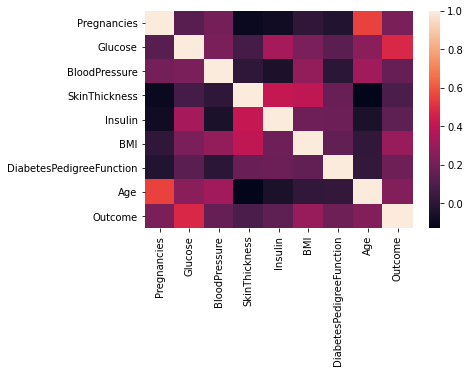

In [ ]:
sns.heatmap(diabetes_df.corr())

Features that can be dropped:

SkinThickness, BloodPressure and Insulin

In [ ]:
#Removing columns SkinThickness, BloodPressure, Insulin

X = diabetes_df.drop(columns=['Outcome','SkinThickness','BloodPressure','Insulin'])
y = diabetes_df['Outcome']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (724, 5)
Shape of y: (724,)


In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of X_train: (543, 5)
Shape of X_test: (181, 5)
Shape of y_train: (543,)
Shape of y_test: (181,)


In [ ]:
def run_models(train_X,train_y,test_X,test_y):   
    models = [LogisticRegression(),GaussianNB(),SVC(kernel='linear'),KNeighborsClassifier(),
              DecisionTreeClassifier(),RandomForestClassifier(n_estimators=20,random_state=0),XGBClassifier()]
    train_accuracy_models = []
    test_accuracy_models = []
    classifiers = pd.Series(['LogisticRegression','GaussianNB','SVC','KNeighborsClassifier',
                             'DecisionTreeClassifier','RandomForestClassifier','XGBClassifier'])
    for model in models:
        model.fit(train_X,train_y)
        y_pred = model.predict(test_X)
        train_acc = model.score(train_X,train_y)
        test_acc = accuracy_score(test_y,y_pred)
        train_accuracy_models.append(train_acc)
        test_accuracy_models.append(test_acc)
        #rmse_models.append(model_rmse)
    results = pd.DataFrame(data={'Classifiers':classifiers,'Train Accuracy':train_accuracy_models,'Test Accuracy':test_accuracy_models})#'RMSE':rmse_models})
    return results

In [ ]:
results = run_models(X_train,y_train,X_test,y_test)

In [ ]:
results

,Classifiers,Train Accuracy,Test Accuracy
0,LogisticRegression,0.777164,0.779006
1,GaussianNB,0.766114,0.751381
2,SVC,0.777164,0.773481
3,KNeighborsClassifier,0.808471,0.795580
4,DecisionTreeClassifier,1.000000,0.729282
5,RandomForestClassifier,1.000000,0.823204
6,XGBClassifier,0.872928,0.784530


**Converting BMI to categorical feature**

In [ ]:
BMICategory = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

diabetes_df_bmicat = diabetes_df.copy()
diabetes_df_bmicat["BMICategory"] = BMICategory

diabetes_df_bmicat.loc[diabetes_df_bmicat["BMI"] < 18.5, "BMICategory"] = BMICategory[0]
diabetes_df_bmicat.loc[(diabetes_df_bmicat["BMI"] > 18.5) & (diabetes_df_bmicat["BMI"] <= 24.9), "BMICategory"] = BMICategory[1]
diabetes_df_bmicat.loc[(diabetes_df_bmicat["BMI"] > 24.9) & (diabetes_df_bmicat["BMI"] <= 29.9), "BMICategory"] = BMICategory[2]
diabetes_df_bmicat.loc[(diabetes_df_bmicat["BMI"] > 29.9) & (diabetes_df_bmicat["BMI"] <= 34.9), "BMICategory"] = BMICategory[3]
diabetes_df_bmicat.loc[(diabetes_df_bmicat["BMI"] > 34.9) & (diabetes_df_bmicat["BMI"] <= 39.9), "BMICategory"] = BMICategory[4]
diabetes_df_bmicat.loc[diabetes_df_bmicat["BMI"] > 39.9 ,"BMICategory"] = BMICategory[5]

In [ ]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabetes_df_bmicat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMICategory
0,6,148,72,35,0,33.6,0.627,50,1,Obesity 1
1,1,85,66,29,0,26.6,0.351,31,0,Overweight
2,8,183,64,0,0,23.3,0.672,32,1,Normal
3,1,89,66,23,94,28.1,0.167,21,0,Overweight
4,0,137,40,35,168,43.1,2.288,33,1,Obesity 3
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Obesity 1
764,2,122,70,27,0,36.8,0.340,27,0,Obesity 2
765,5,121,72,23,112,26.2,0.245,30,0,Overweight
766,1,126,60,0,0,30.1,0.349,47,1,Obesity 1


In [ ]:
BMI_data = pd.get_dummies(diabetes_df_bmicat.BMICategory,prefix='BMI')
BMI_data

,BMI_Normal,BMI_Obesity 1,BMI_Obesity 2,BMI_Obesity 3,BMI_Overweight,BMI_Underweight
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
763,0,1,0,0,0,0
764,0,0,1,0,0,0
765,0,0,0,0,1,0
766,0,1,0,0,0,0


In [ ]:
diabetes_df_bmicat.drop(columns=['BMICategory'],inplace=True)
diabetes_df_bmicat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabetes_df_bmicat = diabetes_df_bmicat.join(BMI_data)

In [ ]:
diabetes_df_bmicat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Normal,BMI_Obesity 1,BMI_Obesity 2,BMI_Obesity 3,BMI_Overweight,BMI_Underweight
0,6,148,72,35,0,33.6,0.627,50,1,0,1,0,0,0,0
1,1,85,66,29,0,26.6,0.351,31,0,0,0,0,0,1,0
2,8,183,64,0,0,23.3,0.672,32,1,1,0,0,0,0,0
3,1,89,66,23,94,28.1,0.167,21,0,0,0,0,0,1,0
4,0,137,40,35,168,43.1,2.288,33,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,1,0,0,0,0
764,2,122,70,27,0,36.8,0.340,27,0,0,0,1,0,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0,0,0,0,1,0
766,1,126,60,0,0,30.1,0.349,47,1,0,1,0,0,0,0


In [ ]:
#Removing columns SkinThickness, BloodPressure, Insulin

X = diabetes_df_bmicat.drop(columns=['Outcome'])
y = diabetes_df_bmicat['Outcome']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (724, 14)
Shape of y: (724,)


In [ ]:
#Scaling Data
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of X_train: (543, 14)
Shape of X_test: (181, 14)
Shape of y_train: (543,)
Shape of y_test: (181,)


In [ ]:
results = run_models(X_train,y_train,X_test,y_test)

In [ ]:
results

,Classifiers,Train Accuracy,Test Accuracy
0,LogisticRegression,0.782689,0.767956
1,GaussianNB,0.473297,0.430939
2,SVC,0.779006,0.767956
3,KNeighborsClassifier,0.828729,0.756906
4,DecisionTreeClassifier,1.000000,0.751381
5,RandomForestClassifier,1.000000,0.790055
6,XGBClassifier,0.898711,0.773481


**Removing only SkinThickness and Insulin**

In [ ]:
#Removing columns SkinThickness, BloodPressure, Insulin

X = diabetes_df.drop(columns=['SkinThickness','BloodPressure','Insulin','Outcome'])
y = diabetes_df['Outcome']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (724, 5)
Shape of y: (724,)


In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of X_train: (543, 5)
Shape of X_test: (181, 5)
Shape of y_train: (543,)
Shape of y_test: (181,)


In [ ]:
results = run_models(X_train,y_train,X_test,y_test)

In [ ]:
results

,Classifiers,Train Accuracy,Test Accuracy
0,LogisticRegression,0.777164,0.779006
1,GaussianNB,0.766114,0.751381
2,SVC,0.777164,0.773481
3,KNeighborsClassifier,0.808471,0.795580
4,DecisionTreeClassifier,1.000000,0.751381
5,RandomForestClassifier,1.000000,0.795580
6,XGBClassifier,0.872928,0.784530


**Using Recursive Function Elimination Technique**

In [ ]:
#Using RFECV

stratcv = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
model = KNeighborsClassifier()
rfecv = RFECV(estimator=model, step=1, cv=stratcv, scoring='accuracy')
rfecv.fit(X,y)

# Load Scaler

In [ ]:
sc1 = pickle.load(open('scaler.pkl','rb'))
print(sc1)

StandardScaler(copy=True, with_mean=True, with_std=True)
